# LFA - Laboratoire 0
## Introduction to python

<i> Modified from lab-1 MLBD, courtesy of Julien Rebetez, Aitana Lebrand. </i>
- Professeur: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant: Héctor Satizábal (<a href="mailto:hector-fabio.satizaba-mejia@heig-vd.ch">hector-fabio.satizaba-mejia@heig-vd.ch</a>)

Date: Printemps 2016

> Throughout the laboratories, questions that you should answer are highlighted as follow :
> <p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>0. </b></font> This is a question.</p>

## 1. Introduction to IPython notebooks

In this laboratory you are going to learn how to perform interactive computing using **IPython**. **IPython** is an interactive shell for python that has more functionnalities than the basic one. This guide does not start from the basics of the general purpose language **python**. If you do not know this language, it is recommended to follow a **python** tutorial in order to learn the basic concepts and commands. You can have a look at the [official python tutorial](https://docs.python.org/2/tutorial/) or [Google's python tutorial](https://developers.google.com/edu/python/) for example.

Note that for this course, we will use the Python 2.7.X series. (Important: do not use Python 3.5.X as it will require performing many adaptations to the current version of the laboratories)

You will use a browser-based notebook to interactively explore a dataset by:
- Reading raw data from ascii files
- Reading typed data (data frames) from ascii files
- Selecting specific columns and/or rows from a dataset
- Filtering datasets
- Plotting the information in the dataset (e.g., scatter-plot, boxplot, histogram)

### Using the notebooks

You are in an IPython notebook right now. An IPython notebook is a web interface to a Python interpreter.

A notebook is made of cells. Each cell has a type which defines what happens when it is run. 

- Markdown cells allow you to write [Markdown](http://daringfireball.net/projects/markdown/) text in them. They are just displayed as HTML when run.
- Code cells contain python code. When the cell is run, the code is sent to the python interpreter, executed and you get the result in the cell output.
- Various header cells that allow you to structure your document.

You can change the type of a cell using the drop-down menu in the toolbar.

You can click (for Code cells) or double-click (for headers and markdown cells) on cells to edit their content. You can then use keyboard shortcuts to run them :

- Ctrl + Enter : run in place
- Shift + Enter : run and move to next cell
- Alt + Enter : run and insert new cell after

In [2]:
# This is a code cell containing python code !
print(2+2)

4


The python interpreter that executes the code you write in the notebook is called a *Kernel*. You can restart the kernel (the interpreter) using the *Kernel* menu. This is useful if you want to delete all your variables.

Ipython has also "magic" functions that start with % . They allow you to do a lot of useful things with your ipython environment :

http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb

The %who magic gives you a list of the defined python variables. object? can be used to get documentation about an object :

In [3]:
a = 2
%who

a	 


In [4]:
def my_documented_function(a):
    """This is a revolutionary function that returns a + 1"""
    return a + 1

print(my_documented_function(2))
print('This is the traditional python help() function :\n')
help(my_documented_function)
print('End of help() command output \n')

# We can access the same info with just ? (note that you have to run this cell to view the effect).
my_documented_function?
# The output may be provided in a separate pane in your browser

3
This is the traditional python help() function :

Help on function my_documented_function in module __main__:

my_documented_function(a)
    This is a revolutionary function that returns a + 1

End of help() command output 



## 2. Scientific computing with NumPy

Python has a number of packages (libraries) dedicated to scientific programming :

The foundation is [numpy](http://www.numpy.org/) which provides a N-dimensional array implementation with a nice indexing syntax (similar to MATLAB).

Then comes [scipy](http://www.scipy.org/) which contains a number of algorithms (signal processing, distance computation, etc...) built on top of numpy.

[matplotlib](http://matplotlib.org/) is a library to create 2D plots.

[pandas](http://pandas.pydata.org/) provides a DataFrame implementation, which is a layer on top of numpy arrays that makes some things (handling missing values, date indexing) easier. Heavily inspired by the [R](http://www.r-project.org/) statistical computing language.

[scikit-learn](http://scikit-learn.org/stable/) is a machine learning library that contains implementations of many of the most popular machine learning algorithms.

[theano](http://deeplearning.net/software/theano/) allows you to write programs that are compiled and run on a GPU.

Finally, this is not a python package, but [stack overflow](http://stackoverflow.com/) is a really good question-and-answers site where you can probably find answers to the most common problems you'll have :-)

For this course, we strongly suggest that you install and use [anaconda](https://store.continuum.io/cshop/anaconda/). It is a "python distribution" that comes with a package manager (conda) and all of the scientific packages listed above (and many others) pre-installed.

## 3. Quick numpy introduction

Numpy allows you to define [multidimensionnal arrays](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (recommended reading).

In [5]:
# Makes the numpy function available as np.<funcname> (np is a convention)
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]]
)

print(array1.shape)

# The last line of a python cell is evaluated and used as the output for the cell
array1

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

The array elements can be accessed using the [indexing syntax](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing) (recommended reading). Numpy (and python) uses 0-based indexing.

In [6]:
print("element (2,3) : ", array1[1,2])
print("first row     : ", array1[0,:])
print("second column : ", array1[:,1])
print("second and third element of the second row : ", array1[1, 1:])

element (2,3) :  6
first row     :  [1 2 3]
second column :  [2 5]
second and third element of the second row :  [5 6]


You can do a [lot of things](http://docs.scipy.org/doc/numpy/reference/) with numpy arrays. For example, we can compute the mean of each column :

In [7]:
array1.mean(axis=1)

array([ 2.,  5.])

We can also sort an array :

In [9]:
array2 = np.array([5, 8, 2, 9, 4, 3])
print("original      : ", array2)

print("using argsort : ", array2[np.argsort(array2)]) # the fancy indexing version

array2.sort() # not that this does in-place sorting, so it *modifies* array2
print("after sort()  : ", array2)

original      :  [5 8 2 9 4 3]
using argsort :  [2 3 4 5 8 9]
after sort()  :  [2 3 4 5 8 9]


We can also use comparison operators on arrays, giving us a boolean mask. And then use the mask to index the array :

In [10]:
mask = array1 == 5
print(array1)
print(mask)
print(array1[mask])

[[1 2 3]
 [4 5 6]]
[[False False False]
 [False  True False]]
[5]


As exercices, do the following :

- Compute the max of each row. Each column ?
- Print the elements of array1 that are less than 4 (without a for loop)

## 4. Classifying the Iris flower dataset

We will use the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris flower dataset</a> to introduce you to the basics of plotting and machine learning (classification). This dataset contains 150 entries of irises with their petal and sepal lengths/widths. Three different classes of irises are present in this dataset (Setosa, Versicolour, and Virginica). Your goal will be to build a classifier that can recognize the iris class, based on the petal length and petal width. 

Start by loading the data.

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
Y = iris.target

### Visualization

Visualize the data using a scatter plot.

Populating the interactive namespace from numpy and matplotlib


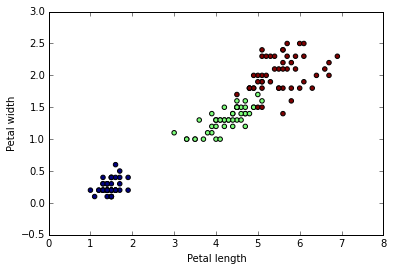

In [26]:
import pylab as pl # pylab is matplotlib
# The line below enables matplotlib-ipython integration and allows plots to be displayed inline in the
# notebook. The --no-import-all is to avoid polluting our namespace with a import *
%pylab inline --no-import-all

pl.scatter(X[:, 0], X[:, 1], c=Y)
pl.xlabel('Petal length')
pl.ylabel('Petal width')

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.1. </b></font> By looking at this scatter plot, do you feel that building a classifier of iris class based on petal length and petal width will be an easy task? (Justify briefly)</p>

Votre réponse...

### Classification

To build and evaluate a machine learning model, we need to split our data into training and testing sets. Scikit learn has a [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) module that helps with this task.

In [33]:
from sklearn import cross_validation
# train and test are indices arrays containing the indices of train/test samples
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, Y, test_size=0.4, random_state=0 # we fix random state for reproducibility)
)

print("train shape : ", train.shape)
print("test shape  : ", test.shape)

train shape :  (90,)
test shape  :  (60,)


We'll use the [k Nearest Neighbor](http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) to classify the iris flower dataset. This classifier will classify a new sample by assigning it the class of its k-nearest neighbors.

The algorithm therefore consists of the following three steps:
- compute the distance between a sample in the test set and all the samples in the training set
- find the k-nearest neighbors in the training set
- assign a class to the sample in the test set by taking the majority class among the k-nearest neighbors.

In [35]:
from sklearn import neighbors

n_neighbors = 5 # k=5, i.e. 5-nearest neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors) 
clf.fit(X_train, y_train)

# predict class of entries in the test set
pred_kNN = clf.predict(X_test)

In order to visualize the performance of the classifier, represent the confusion matrix:

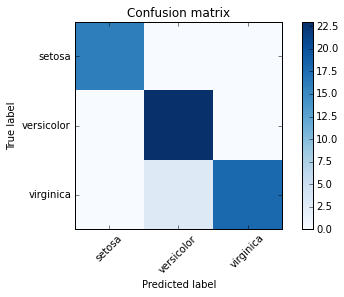

In [39]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_iris(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test,pred_kNN)
plot_confusion_matrix_iris(cm)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.2. </b></font> Explain (briefly) what this confusion matrix shows.</p>

Votre réponse...

In order to have a quantitative measure of performance, several <a href="https://en.wikipedia.org/wiki/Precision_and_recall">metrics</a> can be used. In the following, we use accuracy, i.e. the proportion of true results (both true positives and true negatives) among the total number of cases examined. Note that in general, you should use several metrics, depending on the problem.

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_kNN)
print('Accuracy = '+str(100*acc)+'%')

Accuracy = 95.0%


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.3. </b></font> In our example, we only used two features (petal length and petal width). Try classifying with all four features and compare the performance. Try also varying the number of neighbors, k.</p>

Votre réponse... Décrivez brièvement les résultats que vous obtenez et vos conclusions.

### ALLER PLUS LOIN...

Si le machine learning vous parle et que vous souhaitez voir un cas d'application plus réel plutôt qu'un "toy dataset", vous pouvez consulter également le <a href="http://193.134.218.37/labs/lab1/lab1.zip">notebook suivant</a> et aller directement à la section "WINE".

## 5. Cool links

### Scikit-learn cheatsheet

There is a [cheatsheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/) available on scikit-learn's website that help you choose an algorithm when you're lost. It is of course simplified and doesn't include all algorithms and criterions, but it is a good starting point.

### Interesting ipython notebooks

[nbviewer.ipython.org](http://nbviewer.ipython.org/) has a nice collection of ipython notebooks that showcase various libraries (and even different languages) that you can use with ipython.